In [19]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
#from google.colab.patches import cv2_imshow
from PIL import Image
import cv2
import scipy.misc
import matplotlib
#import xgboost as XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, ConvLSTM2D, Flatten, Dropout, MaxPooling2D,MaxPooling3D, TimeDistributed, Conv2D, LSTM, SimpleRNN, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler

import io
import matplotlib.pyplot as plt
import imageio
from sklearn.metrics import r2_score
# from IPython.display import Image, display
# from ipywidgets import widgets, Layout, HBox
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import UpSampling3D
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import History
from tensorflow import keras
import tensorflow_addons as tfa

from keras.layers import Conv3D, MaxPool3D, Flatten, Dense, LSTM
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta
import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
import h5py
import pickle
import tensorflow as tf


In [20]:
def load_data():
    data = []
    path = rf"{os.getcwd()}\src\yearly_data"
    for file in os.listdir(path):
        df = pd.read_csv(f'{path}/{file}')
        df.drop(columns=[df.columns[0]], axis=1, inplace=True)
        df.fillna(0.0, inplace=True)
        data.append(df.to_numpy())
    return np.array(data)

data = load_data()


In [21]:
full_data = data
full_data.shape

(40, 277, 228)

In [22]:
data = full_data

In [23]:
data_shifted = data[2:]
data_shifted.shape

(38, 277, 228)

In [24]:
data = data[:-2]
data.shape

(38, 277, 228)

In [25]:
data = data.reshape((38, 277, 228, 1))
# data = data.reshape((2100, 277, 228, 1))

In [26]:
data.shape

(38, 277, 228, 1)

In [27]:
data[0][0][0]

array([49.02999878])

In [28]:
train_dataset = data[:32]
train_labels = data_shifted[:32]
test_dataset = data[-6:]
test_labels = data_shifted[-6:]
# train_dataset = data[:1700]
# train_labels = data_shifted[:1700]
# test_dataset = data[-400:]
# test_labels = data_shifted[-400:]
print("Training Dataset Shapes: " + str(train_dataset.shape) + ", " + str(train_labels.shape))
print("Validation Dataset Shapes: " + str(test_dataset.shape) + ", " + str(test_labels.shape))
 # Save the variables to a file
np.save("train_dataset.npy", train_dataset)
np.save("train_labels.npy", train_labels)
np.save("test_dataset.npy", test_dataset)
np.save("test_labels.npy", test_labels)

Training Dataset Shapes: (32, 277, 228, 1), (32, 277, 228)
Validation Dataset Shapes: (6, 277, 228, 1), (6, 277, 228)


In [29]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
# choose a number of time steps
n_steps = 2
# split into samples
traindata = np.reshape(train_dataset, (32,63156))
trainlabel =  np.reshape(train_labels,(32,63156) )
X, y = split_sequence(traindata, n_steps)
X.shape, y.shape

((30, 2, 63156), (30, 63156))

In [30]:
n_steps = 2
testdata = np.reshape(test_dataset, (6,63156))
testlabel =  np.reshape(test_labels,(6,63156) )
XTest, YTest = split_sequence(testdata, n_steps)
print(XTest.shape, YTest.shape)
n_features = XTest.shape[2]
XTest = XTest.reshape((XTest.shape[0], XTest.shape[1], n_features))

(4, 2, 63156) (4, 63156)


In [31]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# define model
n_features = X.shape[2]
X = X.reshape((X.shape[0], X.shape[1], n_features))
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2, padding ='same'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(63156))
model.compile(optimizer='adam', loss='mae', metrics=['mse'])
# fit model
history= model.fit(X, y, epochs=50, validation_data=(XTest, YTest), verbose=2)
np.save(rf"{os.getcwd()}\models\1dcnn\1dcnn.npy", history.history)
model.save(rf"{os.getcwd()}\models\1dcnn\1dcnn.h5")
# demonstrate prediction

Epoch 1/50
1/1 - 2s - loss: 45.8474 - mse: 2709.6680 - val_loss: 54.2216 - val_mse: 4495.5708 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 1s - loss: 44.9596 - mse: 3227.3220 - val_loss: 49.1911 - val_mse: 3763.4629 - 676ms/epoch - 676ms/step
Epoch 3/50
1/1 - 1s - loss: 41.8554 - mse: 2843.5461 - val_loss: 43.6849 - val_mse: 2689.8411 - 661ms/epoch - 661ms/step
Epoch 4/50
1/1 - 1s - loss: 34.1000 - mse: 1750.1877 - val_loss: 37.7091 - val_mse: 2095.9709 - 723ms/epoch - 723ms/step
Epoch 5/50
1/1 - 1s - loss: 29.9247 - mse: 1390.2576 - val_loss: 36.2847 - val_mse: 2069.0430 - 703ms/epoch - 703ms/step
Epoch 6/50
1/1 - 1s - loss: 32.7311 - mse: 1745.9830 - val_loss: 28.1849 - val_mse: 1242.5487 - 655ms/epoch - 655ms/step
Epoch 7/50
1/1 - 1s - loss: 24.2492 - mse: 948.6236 - val_loss: 29.0291 - val_mse: 1257.5100 - 574ms/epoch - 574ms/step
Epoch 8/50
1/1 - 1s - loss: 22.9742 - mse: 825.8359 - val_loss: 28.3792 - val_mse: 1235.8203 - 742ms/epoch - 742ms/step
Epoch 9/50
1/1 - 1s - loss: 23.6554 - ms

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import History
from tensorflow import keras
import tensorflow_addons as tfa
model_1dcnn = load_model(rf"{os.getcwd()}\models\1dcnn\1dcnn.h5")
history_1dcnn = np.load(rf"{os.getcwd()}\models\1dcnn\1dcnn.npy",allow_pickle=True).item()
history_1dcnn.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

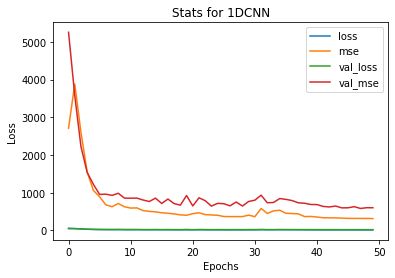

In [ ]:
# Results of updated model6

plt.plot(history_1dcnn['loss'])
plt.plot(history_1dcnn['mse'])
plt.plot(history_1dcnn['val_loss'])
plt.plot(history_1dcnn['val_mse'])

plt.title('Stats for 1DCNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','mse','val_loss','val_mse'])
plt.show()

In [ ]:
framed = XTest[0]
(np.expand_dims(framed, axis=0)).shape

(1, 2, 63156)

1/1 [==============================] - 0s 335ms/step
(1, 63156)
0.02816458666083098


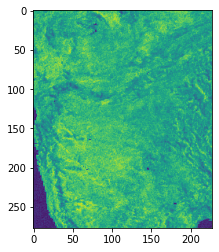

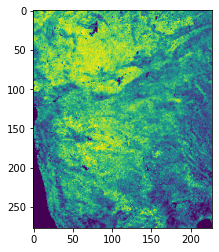

In [ ]:
model = model_1dcnn
from sklearn.metrics import r2_score
framed = XTest[0]
pred = model.predict(np.expand_dims(framed, axis=0))
print(pred.shape)
y_real = YTest[0].reshape(277,228)
pred = pred.reshape(277,228)
r2 = r2_score(y_real,pred)
print(r2)
plt.imshow(pred.reshape(277,228))
plt.figure()
plt.imshow(y_real.reshape(277,228))